<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

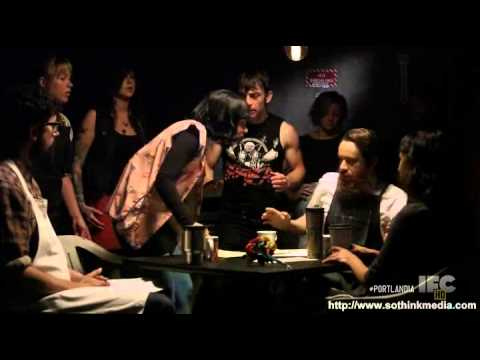

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'/home/ivan/Desktop/Lambda/Unit4/Sprint1/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [4]:
shops.shape

(7616, 3)

### Find and remove words in star rating

In [5]:
# find int in star rating

int(shops['star_rating'][1].strip().split('.')[0])


4

In [6]:
# strip the rest of it out with lambda func

shops['star_rating'] = shops['star_rating'].apply(lambda x: int(x.strip().split('.')[0]))
shops.head()


,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4


In [7]:
shops.dtypes

coffee_shop_name    object
full_review_text    object
star_rating          int64
dtype: object

In [8]:
# strip dates out of full review text and make own column

shops['review_date'] = shops['full_review_text'].apply(lambda x: x.split()[0])
shops.head()

,coffee_shop_name,full_review_text,star_rating,review_date
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5,11/25/2016
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4,12/2/2016
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4,11/30/2016
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2,11/25/2016
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4,12/3/2016


In [9]:
# now that they are pulled, remove from full_review_text

shops['full_review_text'] = shops['full_review_text'].apply(lambda x: ' '.join(x.split()[1:]))
shops.head()

,coffee_shop_name,full_review_text,star_rating,review_date
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Eve...,5,11/25/2016
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4,12/2/2016
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved the ...,4,11/30/2016
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating Howe...,2,11/25/2016
4,The Factory - Cafe With a Soul,1 check-in They are located within the Northcr...,4,12/3/2016


In [10]:
# create check in feature and remove

shops['num_check_in'] = shops['full_review_text'].apply(lambda x: x.split()[0]
                                                       if x.split()[1]=='check-in'
                                                       or x.split()[1]=='check-ins'
                                                       else 0)
shops.head()

,coffee_shop_name,full_review_text,star_rating,review_date,num_check_in
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Eve...,5,11/25/2016,1
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4,12/2/2016,0
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved the ...,4,11/30/2016,1
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating Howe...,2,11/25/2016,0
4,The Factory - Cafe With a Soul,1 check-in They are located within the Northcr...,4,12/3/2016,1


In [11]:
shops['full_review_text'] = shops['full_review_text'].apply(lambda x: ' '.join(x.split()[2:]) 
                                                        if x.split()[1]=='check-in'
                                                        or x.split()[1]=='check-ins'
                                                        else x)
shops.head()

,coffee_shop_name,full_review_text,star_rating,review_date,num_check_in
0,The Factory - Cafe With a Soul,Love love loved the atmosphere! Every corner o...,5,11/25/2016,1
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4,12/2/2016,0
2,The Factory - Cafe With a Soul,Listed in Brunch Spots I loved the eclectic an...,4,11/30/2016,1
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating Howe...,2,11/25/2016,0
4,The Factory - Cafe With a Soul,They are located within the Northcross mall sh...,4,12/3/2016,1


In [12]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,review_date,num_check_in
0,The Factory - Cafe With a Soul,Love love loved the atmosphere! Every corner o...,5,11/25/2016,1
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4,12/2/2016,0
2,The Factory - Cafe With a Soul,Listed in Brunch Spots I loved the eclectic an...,4,11/30/2016,1
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating Howe...,2,11/25/2016,0
4,The Factory - Cafe With a Soul,They are located within the Northcross mall sh...,4,12/3/2016,1


In [13]:
# check for whitespace

shops['full_review_text'][0]

'Love love loved the atmosphere! Every corner of the coffee shop had its own style, and there were swings!!! I ordered the matcha latte, and it was muy fantastico! Ordering and getting my drink were pretty streamlined. I ordered on an iPad, which included all beverage selections that ranged from coffee to wine, desired level of sweetness, and a checkout system. I got my latte within minutes! I was hoping for a typical heart or feather on my latte, but found myself listing out all the possibilities of what the art may be. Any ideas?'

In [14]:
# make lowercase for spacey and stop words

shops['full_review_text'] = shops['full_review_text'].apply(lambda x: x.lower())
shops.head()

,coffee_shop_name,full_review_text,star_rating,review_date,num_check_in
0,The Factory - Cafe With a Soul,love love loved the atmosphere! every corner o...,5,11/25/2016,1
1,The Factory - Cafe With a Soul,"listed in date night: austin, ambiance in aust...",4,12/2/2016,0
2,The Factory - Cafe With a Soul,listed in brunch spots i loved the eclectic an...,4,11/30/2016,1
3,The Factory - Cafe With a Soul,very cool decor! good drinks nice seating howe...,2,11/25/2016,0
4,The Factory - Cafe With a Soul,they are located within the northcross mall sh...,4,12/3/2016,1


In [15]:
pd.set_option('display.max_colwidth', 0)
shops.head()

,coffee_shop_name,full_review_text,star_rating,review_date,num_check_in
0,The Factory - Cafe With a Soul,"love love loved the atmosphere! every corner of the coffee shop had its own style, and there were swings!!! i ordered the matcha latte, and it was muy fantastico! ordering and getting my drink were pretty streamlined. i ordered on an ipad, which included all beverage selections that ranged from coffee to wine, desired level of sweetness, and a checkout system. i got my latte within minutes! i was hoping for a typical heart or feather on my latte, but found myself listing out all the possibilities of what the art may be. any ideas?",5,11/25/2016,1
1,The Factory - Cafe With a Soul,"listed in date night: austin, ambiance in austin beautiful!!!! love the ambiance! instagram-worthy!!! definitely $$$, so be prepared. this is gonna cost you a pretty penny :) waffle dessert was just decent...nothing to rave about. but, will probably be back just to be somewhere unique and nice.",4,12/2/2016,0
2,The Factory - Cafe With a Soul,"listed in brunch spots i loved the eclectic and homey plush decor and who doesn't want to swing and drink their coffee? i would categorize this as a pricier coffee place but, to me it was worth it. after thanksgiving nobody wants to make brunch so we headed out in search of chicken and waffles. there is ample parking in the private lot and ordering is done through i-pads. pick a seat and they will call your name when your items are ready. be patient because some of the coffee drinks take longer than others. i had the cold brew coffee, chicken and waffles and we shared a pop+art! the po+art was strawberry; light and fluffy on the outside and gooey sweet filling on the inside. the chicken and waffles wasn't the standard so expect different, complex and interesting flavors from the accompanying slaw and sauce. i thoroughly enjoyed it but, the waffle was a bit bland and maybe could have used a bit of honey to spruce it up. the coffee here is spot on and i hear that their hot chocolate is the bomb but, i will have to wait for the weather to cool off to try that. a great place to be cozy and chat with your friends, a date or read a book. chicken and waffles pop tart coffee see all photos from carmela s. for the factory - cafe with a soul",4,11/30/2016,1
3,The Factory - Cafe With a Soul,very cool decor! good drinks nice seating however... just about everything is overpriced. $1.50 extra for 3 ounces of almond milk in a cortado. no wifi music is a bit loud and the mix is odd. pleasant french oldies followed by loud techno. several tables were dirty when we got there. service is average. it feels like a los angeles coffee shot that is out of place.,2,11/25/2016,0
4,The Factory - Cafe With a Soul,"they are located within the northcross mall shopping center facing east toward burnet rd with plenty of parking. i loved their computerized user friendly ordering system, it made it easy me to pick & choose all the items i wanted to try. i ordered pop tart, chicken & waffles, strawberry waffles (photos uploaded). this place is ideal for ordering a few dishes to share with your group. seating is limited since this place is fairly new with lots of visitors. arrive early and be prepared to wait a bit if you with a large grop. store front facing burnet rd see all photos from michelle a. for the factory - cafe with a soul",4,12/3/2016,1


In [16]:
## import spacy and initialize tokenizer

import spacy
from spacy.tokenizer import Tokenizer

In [17]:
# nlp model
nlp = spacy.load('en_core_web_lg')

#tokenizer
tokenizer = Tokenizer(nlp.vocab)


In [18]:
# check for stop words

nlp.vocab['listed'].is_stop = True
nlp.vocab['listed'].is_stop

True

In [19]:
# Tokenizer pipeline

tokens = []

# make tokens

for doc in nlp.pipe(shops['full_review_text'], disable=['tagger', 'parser', 'ner']):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop==False) & (token.is_punct==False):
            doc_tokens.append(token.text)
            
    tokens.append(doc_tokens)
        
shops['tokens'] = tokens

In [20]:
shops['tokens'].head()

0    [love, love, loved, atmosphere, corner, coffee, shop, style, swings, ordered, matcha, latte, muy, fantastico, ordering, getting, drink, pretty, streamlined, ordered, ipad, included, beverage, selections, ranged, coffee, wine, desired, level, sweetness, checkout, system, got, latte, minutes, hoping, typical, heart, feather, latte, found, listing, possibilities, art, ideas]                                                                                                                                                                                                                                                                                                                                                                                                                              
1    [date, night, austin, ambiance, austin, beautiful, love, ambiance, instagram, worthy, definitely, $, $, $, prepared, gon, na, cost, pretty, penny, waffle, dessert, decent, rave, probably, unique, nice]

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [21]:
# find wordcounts

from collections import Counter

def count(docs):
    
    word_counts = Counter()
    appears_in = Counter()
    
    total_docs = len(docs)
    
    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))
        
    temp= zip(word_counts.keys(), word_counts.values())
    
    wc = pd.DataFrame(temp, columns = ['word', 'count'])
    
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()
    
    wc['pct_total'] = wc['count'].apply(lambda x: x / total)
    
    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()
    
    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc, on='word')
    
    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
    
    return wc.sort_values(by='rank')

In [22]:
wc = count(shops['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
36,coffee,4911,10539,1.0,0.029723,0.029723,0.644827
126,place,3665,5444,2.0,0.015354,0.045076,0.481224
145,good,2792,3986,3.0,0.011242,0.056318,0.366597
133,great,2843,3932,4.0,0.011089,0.067407,0.373293
163,like,2142,3125,5.0,0.008813,0.076221,0.281250


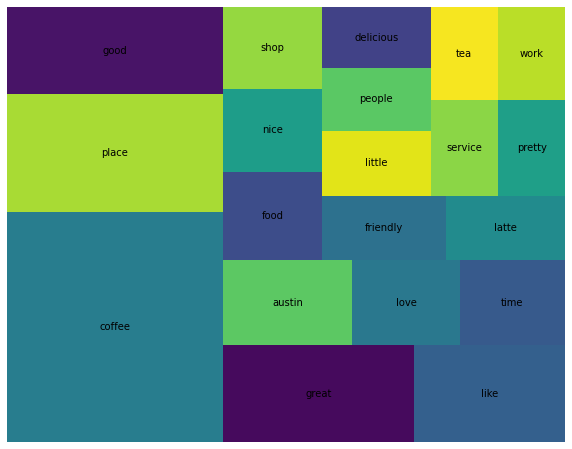

In [23]:
import seaborn as sns
import squarify
import matplotlib.pyplot as plt

t20 = wc[wc['rank'] <= 20]
plt.figure(figsize=(10,8))
squarify.plot(sizes=t20['pct_total'], label=t20['word'])
plt.axis('off')
plt.show()

In [24]:
# now lets try lemmanizing

def get_lemmas(text):
    lemmas = []
    doc = nlp(text.lower())
    
    for token in doc:
        if (token.is_stop == False and token.is_punct == False) and token.pos_ != "-PRON-":
            lemmas.append(token.lemma_)
        return lemmas

In [26]:
# Leverage tqdm for progress_apply
from tqdm import tqdm
tqdm.pandas()

/home/ivan/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [25]:
shops['lemma'] = shops['full_review_text'].apply(lambda row:
                                                [x.lemma_ for x in nlp(row.lower())
                                                if (x.is_stop == False
                                                   and x.is_punct == False)
                                                and x.pos_ != "-PRON-"
                                                ])

KeyboardInterrupt: 

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [27]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,review_date,num_check_in,tokens
0,The Factory - Cafe With a Soul,"love love loved the atmosphere! every corner of the coffee shop had its own style, and there were swings!!! i ordered the matcha latte, and it was muy fantastico! ordering and getting my drink were pretty streamlined. i ordered on an ipad, which included all beverage selections that ranged from coffee to wine, desired level of sweetness, and a checkout system. i got my latte within minutes! i was hoping for a typical heart or feather on my latte, but found myself listing out all the possibilities of what the art may be. any ideas?",5,11/25/2016,1,"[love, love, loved, atmosphere, corner, coffee, shop, style, swings, ordered, matcha, latte, muy, fantastico, ordering, getting, drink, pretty, streamlined, ordered, ipad, included, beverage, selections, ranged, coffee, wine, desired, level, sweetness, checkout, system, got, latte, minutes, hoping, typical, heart, feather, latte, found, listing, possibilities, art, ideas]"
1,The Factory - Cafe With a Soul,"listed in date night: austin, ambiance in austin beautiful!!!! love the ambiance! instagram-worthy!!! definitely $$$, so be prepared. this is gonna cost you a pretty penny :) waffle dessert was just decent...nothing to rave about. but, will probably be back just to be somewhere unique and nice.",4,12/2/2016,0,"[date, night, austin, ambiance, austin, beautiful, love, ambiance, instagram, worthy, definitely, $, $, $, prepared, gon, na, cost, pretty, penny, waffle, dessert, decent, rave, probably, unique, nice]"
2,The Factory - Cafe With a Soul,"listed in brunch spots i loved the eclectic and homey plush decor and who doesn't want to swing and drink their coffee? i would categorize this as a pricier coffee place but, to me it was worth it. after thanksgiving nobody wants to make brunch so we headed out in search of chicken and waffles. there is ample parking in the private lot and ordering is done through i-pads. pick a seat and they will call your name when your items are ready. be patient because some of the coffee drinks take longer than others. i had the cold brew coffee, chicken and waffles and we shared a pop+art! the po+art was strawberry; light and fluffy on the outside and gooey sweet filling on the inside. the chicken and waffles wasn't the standard so expect different, complex and interesting flavors from the accompanying slaw and sauce. i thoroughly enjoyed it but, the waffle was a bit bland and maybe could have used a bit of honey to spruce it up. the coffee here is spot on and i hear that their hot chocolate is the bomb but, i will have to wait for the weather to cool off to try that. a great place to be cozy and chat with your friends, a date or read a book. chicken and waffles pop tart coffee see all photos from carmela s. for the factory - cafe with a soul",4,11/30/2016,1,"[brunch, spots, loved, eclectic, homey, plush, decor, want, swing, drink, coffee, categorize, pricier, coffee, place, worth, thanksgiving, wants, brunch, headed, search, chicken, waffles, ample, parking, private, lot, ordering, pads, pick, seat, items, ready, patient, coffee, drinks, longer, cold, brew, coffee, chicken, waffles, shared, pop+art, po+art, strawberry, light, fluffy, outside, gooey, sweet, filling, inside, chicken, waffles, standard, expect, different, complex, interesting, flavors, accompanying, slaw, sauce, thoroughly, enjoyed, waffle, bit, bland, maybe, bit, honey, spruce, coffee, spot, hear, hot, chocolate, bomb, wait, weather, cool, try, great, place, cozy, chat, friends, date, read, book, chicken, waffles, pop, tart, coffee, photos, carmela, s., factory, ...]"
3,The Factory - Cafe With a Soul,very cool decor! good drinks nice seating however... just about everything is overpriced. $1.50 extra for 3 ounces of almond milk in a cortado. no wifi music is a bit loud and the mix is odd. pleasant french oldies followed by loud techno. several tables were dirty when we got ther

In [29]:
# separate good (4 and 5) and bad (3 and below)

# make copy of shops

s2 = shops.copy()

s2.head()

,coffee_shop_name,full_review_text,star_rating,review_date,num_check_in,tokens
0,The Factory - Cafe With a Soul,"love love loved the atmosphere! every corner of the coffee shop had its own style, and there were swings!!! i ordered the matcha latte, and it was muy fantastico! ordering and getting my drink were pretty streamlined. i ordered on an ipad, which included all beverage selections that ranged from coffee to wine, desired level of sweetness, and a checkout system. i got my latte within minutes! i was hoping for a typical heart or feather on my latte, but found myself listing out all the possibilities of what the art may be. any ideas?",5,11/25/2016,1,"[love, love, loved, atmosphere, corner, coffee, shop, style, swings, ordered, matcha, latte, muy, fantastico, ordering, getting, drink, pretty, streamlined, ordered, ipad, included, beverage, selections, ranged, coffee, wine, desired, level, sweetness, checkout, system, got, latte, minutes, hoping, typical, heart, feather, latte, found, listing, possibilities, art, ideas]"
1,The Factory - Cafe With a Soul,"listed in date night: austin, ambiance in austin beautiful!!!! love the ambiance! instagram-worthy!!! definitely $$$, so be prepared. this is gonna cost you a pretty penny :) waffle dessert was just decent...nothing to rave about. but, will probably be back just to be somewhere unique and nice.",4,12/2/2016,0,"[date, night, austin, ambiance, austin, beautiful, love, ambiance, instagram, worthy, definitely, $, $, $, prepared, gon, na, cost, pretty, penny, waffle, dessert, decent, rave, probably, unique, nice]"
2,The Factory - Cafe With a Soul,"listed in brunch spots i loved the eclectic and homey plush decor and who doesn't want to swing and drink their coffee? i would categorize this as a pricier coffee place but, to me it was worth it. after thanksgiving nobody wants to make brunch so we headed out in search of chicken and waffles. there is ample parking in the private lot and ordering is done through i-pads. pick a seat and they will call your name when your items are ready. be patient because some of the coffee drinks take longer than others. i had the cold brew coffee, chicken and waffles and we shared a pop+art! the po+art was strawberry; light and fluffy on the outside and gooey sweet filling on the inside. the chicken and waffles wasn't the standard so expect different, complex and interesting flavors from the accompanying slaw and sauce. i thoroughly enjoyed it but, the waffle was a bit bland and maybe could have used a bit of honey to spruce it up. the coffee here is spot on and i hear that their hot chocolate is the bomb but, i will have to wait for the weather to cool off to try that. a great place to be cozy and chat with your friends, a date or read a book. chicken and waffles pop tart coffee see all photos from carmela s. for the factory - cafe with a soul",4,11/30/2016,1,"[brunch, spots, loved, eclectic, homey, plush, decor, want, swing, drink, coffee, categorize, pricier, coffee, place, worth, thanksgiving, wants, brunch, headed, search, chicken, waffles, ample, parking, private, lot, ordering, pads, pick, seat, items, ready, patient, coffee, drinks, longer, cold, brew, coffee, chicken, waffles, shared, pop+art, po+art, strawberry, light, fluffy, outside, gooey, sweet, filling, inside, chicken, waffles, standard, expect, different, complex, interesting, flavors, accompanying, slaw, sauce, thoroughly, enjoyed, waffle, bit, bland, maybe, bit, honey, spruce, coffee, spot, hear, hot, chocolate, bomb, wait, weather, cool, try, great, place, cozy, chat, friends, date, read, book, chicken, waffles, pop, tart, coffee, photos, carmela, s., factory, ...]"
3,The Factory - Cafe With a Soul,very cool decor! good drinks nice seating however... just about everything is overpriced. $1.50 extra for 3 ounces of almond milk in a cortado. no wifi music is a bit loud and the mix is odd. pleasant french oldies followed by loud techno. several tables were dirty when we got ther

In [42]:
average_rating = shops.groupby(['coffee_shop_name'])['star_rating'].mean().sort_values()
shop_records = zip(average_rating.index, average_rating.values)
shop_records = pd.DataFrame(shop_records, columns=['shop_name', 'avg_rating'])

shop_records.head()

,shop_name,avg_rating
0,Once Over Coffee Bar,3.37
1,"Strange Brew, Austin Coffee",3.60
2,Pacha,3.69
3,Kick Butt Coffee Music & Booze,3.72
4,Stinson’s,3.81


In [45]:
# good and bad shops

good_shops = shop_records[shop_records['avg_rating'] >= 4]['shop_name']
bad_shops = shop_records[shop_records['avg_rating'] < 4]['shop_name']

good = shops[shops['coffee_shop_name'].isin(list(good_shops))]
bad = shops[shops['coffee_shop_name'].isin(list(bad_shops))]

In [46]:
# tokenize good and bad

good_token = count(good['tokens'])
bad_token = count(bad['tokens'])

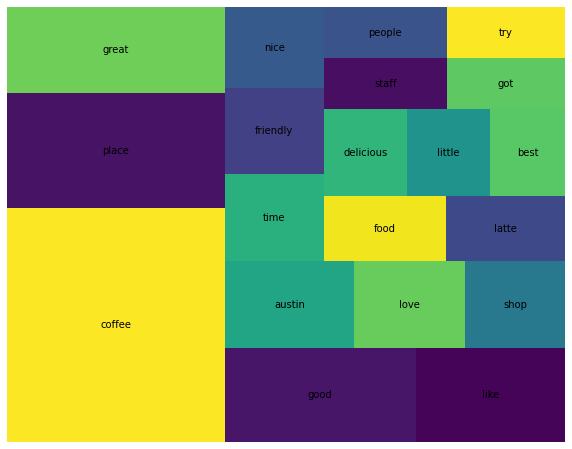

In [48]:
good20 = good_token[good_token['rank'] <= 20]
plt.figure(figsize=(10, 8))
squarify.plot(sizes=good20['pct_total'], label=good20['word'])
plt.axis('off')
plt.show()

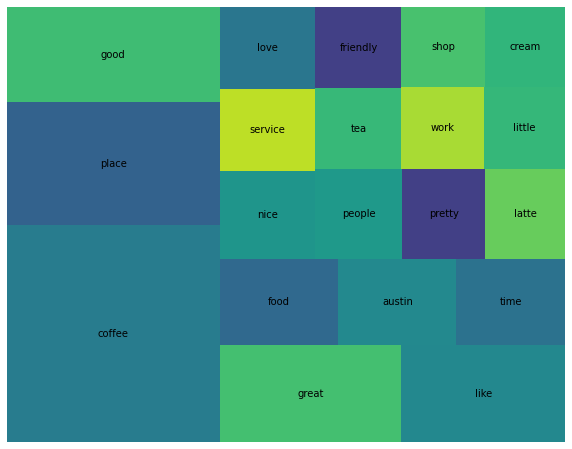

In [49]:
bad20 = bad_token[bad_token['rank'] <= 20]
plt.figure(figsize=(10, 8))
squarify.plot(sizes=bad20['pct_total'], label=bad20['word'])
plt.axis('off')
plt.show()

In [ ]:
# Hmm not much differentiation, stretch goal would be to maybe drop shops with low amount of reviews?



## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

